# **Cáncer de Mama**
## Introducción

El objeto de estudio es el **cáncer de mama**, un tipo de cáncer que se forma en las células de las mamas. Los médicos saben que el cáncer de mama ocurre cuando algunas células mamarias comienzan a crecer de manera anormal. Estas células se dividen más rápido que las células saludables y continúan acumulándose, formando un bulto o masa. Las células pueden diseminarse (hacer metástasis) por la mama hasta los ganglios linfáticos o a otras partes del cuerpo.

Desarrollando este proyecto, es nuestra meta ser capaces de predecir si una muestra de neoplasia se trata de un tejido maligno o benigno.

Un tumor es benigno cuando este sigue generando e imitando células normales que no invaden al organismo, como contrapartida, un tumor maligno se da cuando la reproducción celular es descontrolada y desordenada. Entonces estamos ante un cáncer que crece e invade otras zonas del cuerpo.

Es por esto que es de gran ayuda para la medicina poder clasificar un tumor entre estas dos categorías mediante una muestra de tejido del mismo.

---

- **¿Podemos predecir qué muestras son malignas?**
- **¿De qué depende que lo sean?**

---

## Conjunto de datos

En este documento se efectuará el análisis, agrupamiento y clasificación de los datos pertenecientes al siguiente [dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) alojado en Kaggle. En dicho dataset se recopila información sobre características de la mama que podrían ser indicadores de tumores, y, en concreto, de tumores **benignos** o **malignos**.

Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria y describen las características de los núcleos celulares presentes en dicha imagen.

Información de atributos:

1) Número de identificación

2) Diagnóstico (M = maligno, B = benigno)

3-32)

Se calculan diez características de valor real para cada núcleo celular:
- a) radio (media de las distancias del centro a los puntos del perímetro)
- b) textura (desviación estándar de los valores en escala de grises)
- c) perímetro
- d) área
- e) suavidad (variación local de las longitudes de los radios)
- f) compacidad (perímetro^2 / área - 1,0)
- g) concavidad (gravedad de las partes cóncavas del contorno)
- h) puntos cóncavos (número de porciones cóncavas del contorno)
- i) simetría
- j) dimensión fractal ("aproximación a la línea de costa" - 1)

Se calcularon la media, el error estándar y el "peor" o mayor (media de los tres
de los tres valores más grandes) de estas características para cada imagen,
lo que dio lugar a 30 características. Por ejemplo, el campo 3 es el Radio Medio, el campo
13 es el Error Estándar del Radio y el campo 23 es el Peor Radio.

Todos los valores de las características se recodifican con cuatro dígitos significativos.

## **Carga de datos y librerías**

In [1]:
pip install neupy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.5/208.5 KB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.0/208.0 KB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.2/197.2 KB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tableprint: filename=tableprint-0.7.1-py3-none-any.whl size=6180 sha256=

In [2]:
pip install --upgrade numpy==1.20.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 73.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cmdstanpy 1.1.0 requires numpy>=1.21, but you have numpy 1.20.3 which is incompatible.


In [3]:
import numpy as np

try:
    np.distutils.__config__.blas_opt_info = np.distutils.__config__.blas_ilp64_opt_info
except Exception:
    pass

from neupy import algorithms, utils, init, plots

In [4]:
pip install qiskit-machine-learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 87.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 KB 7.9 MB/s eta 0:00:00


In [5]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.3/241.3 KB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 28.0 MB/s eta 0:00:00
  Created wheel for qiskit: filename=qiskit-0.41.1-py3-none-any.whl size=12918 sha256=3cb3b9607d7fd32547cfcd0e18a628b01e772123940300a6ac86d332c1dfd79c
  Stored in directory: /root/.cache/pip/wheels/03/93/d3/9c1ca2a27a41ea528d1cfd431bf5354745239d7a794d2070a6
Successfully built qiskit
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstal

In [6]:
pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 KB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136833 sha256=8c36e2969723f69dfa35d08f44fef8a018a43b3314e262c4fb3c9d4939e75f55
  Stored in directory: /root/.cache/pip/wheels/72/99/be/81d9bcdf5dd5ee5acd8119a9dd5bc07204c9ce205fd341b021
Successfully built pylatexenc


In [7]:
# Se importan las librerías necesarias, probablemente la lista siga creciendo a medida que se desarrolla el proyecto.
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from operator import itemgetter
from datetime import datetime
import sklearn.metrics as sm
import sklearn.tree as tree
import seaborn as sns
import pandas as pd
import copy

# Librerías utilizadas para agrupamiento basado en prototipos

# Librerías utilizadas para agrupamiento jerárquico
#import scipy
#from scipy.cluster.hierarchy import dendrogram, linkage
#from scipy.cluster.hierarchy import fcluster
#from scipy.cluster.hierarchy import cophenet
#from scipy.spatial.distance import pdist, squareform
#from sklearn.cluster import AgglomerativeClustering, KMeans

# Librería utilizada para agrupamiento basado en densidad
#from sklearn.neighbors import NearestNeighbors
#from sklearn.cluster import DBSCAN
#from sklearn.metrics import calinski_harabasz_score

# Librerías utilizadas para MLP
#from sklearn.linear_model import Perceptron
#from sklearn.neural_network import MLPClassifier
#from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix
#from sklearn.metrics import roc_curve, roc_auc_score

# Librerías utilizadas para SOM
import matplotlib.gridspec as gridspec

# Librerías para entrenamiento clásico 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from qiskit.utils import algorithm_globals
from IPython.display import clear_output
from matplotlib import pyplot as plt
from sklearn.svm import SVC
import time


# Cuántica

from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import EfficientSU2
from qiskit.algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
import qiskit.tools.jupyter

Para cargar los datos del proyecto debemos hacerlo con *pandas* y no importandolo como módulo, ya que dichos datos se encuentran en un repositorio de GitHub, de forma que Google Colab sea capaz de acceder a ellos cada vez que algún miembro del grupo pueda ejecutar el código desde su propio entorno de ejecución.

> El repositorio en cuestión esta en la cuenta de GitHub de Jorge Acevedo de León y cuenta con visibilidad pública: [breast-cancer-data](https://github.com/alu0101123622/breast-cancer-csv)

In [8]:
# Almacenamos el url del repo en una variable.
data_repo_url = 'https://raw.githubusercontent.com/alu0101123622/breast-cancer-csv/main/data.csv'

# Cargamos los datos como un nuevo DataFrame de Pandas. (Breast Cancer DataFrame - bc_df)
bc_df = pd.read_csv(data_repo_url)

# Eliminamos la columna de nombre 'Unannmed', residuo del funcionamiento de lectura
# así como la columna id ya que no aporta ningún valor a los datos.
bc_df.drop(bc_df.filter(regex="Unnamed"), axis=1, inplace=True)
bc_df.drop(['id'], axis=1, inplace=True)
bc_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### **Preparación y visualización de los datos**

Con el fin de asegurarnos de que los datos han sido cargados correctamente y para empezar a familiariazarnos con el formato de los mismos, comenzaremos por mostrar un pequeño fragmento de los datos cargados, comprobando que el número de características (columnas) y sus valores encajan con los esperados.

In [9]:
bc_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Aunque en la página de Kaggle del dataset con el que estamos trabajando se nos informa de que **no** existen valores **nulos** o **no observados**, no está demas comprobarlo, eliminando todos los valores nulos del DataFrame.

In [10]:
bc_df.dropna()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### **Normalización**



Con el objetivo de alcanzar una homogeneidad entre los datos del conjunto, hemos creído apropiado efectuar normalización aplicando min-max scaling.

También conocido como escalado mínimo-máximo o normalización mínima-máxima, es el método más sencillo y consiste en reescalar el rango de características para escalar el rango en [0, 1] o [-1, 1]. La selección del rango objetivo depende de la naturaleza de los datos. La fórmula general para un mínimo-máximo de [0, 1] se da como:

$$ x' = \dfrac{x- min(x)} { max(x) - min(x)} $$

In [11]:
features = bc_df.loc[:, bc_df.columns != 'diagnosis']
features = (features - features.min()) / (features.max() - features.min())

bc_df.loc[:, bc_df.columns != 'diagnosis'] = features

bc_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


Para ver un análisis estadístico simple de los datos, utilizamos el equivalente en **pandas** a la función **summary** de **R**. Pese a esto, teniendo en cuenta que son 30 características que, carecen de un significado real para nosotros, poca información podemos extraer ahora mismo de este estadístico, *sin embargo*, como veremos más adelante nos serán de gran utilidad para la síntesis de las conclusiones del proyecto.

In [12]:
bc_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


A la hora de la visualización de los datos mediante gráficos, nos enfrentamos al recurrente problema (*y ventaja*) de que el dataset cuenta con **30** características, difícilmente visualizables simultáneamente de forma clara. Además, ya que esta visualización de datos se está efectuando previamente al estudio, tampoco pertenece a nuestro conocimiento una ponderación de qué datos son los **más importantes** a la hora de hacer la predicción. 

Algo que si podemos hacer es una comparación de los tumores benignos/malignos del conjunto de datos total.


### **Radio del tumor en relación benigno maligno**

Podemos visualizar el impacto de la característica *radius_mean* (mediana del radio) para comprobar si existe una correlación entre dicho radio y el valor del resultado final (benigno/maligno)

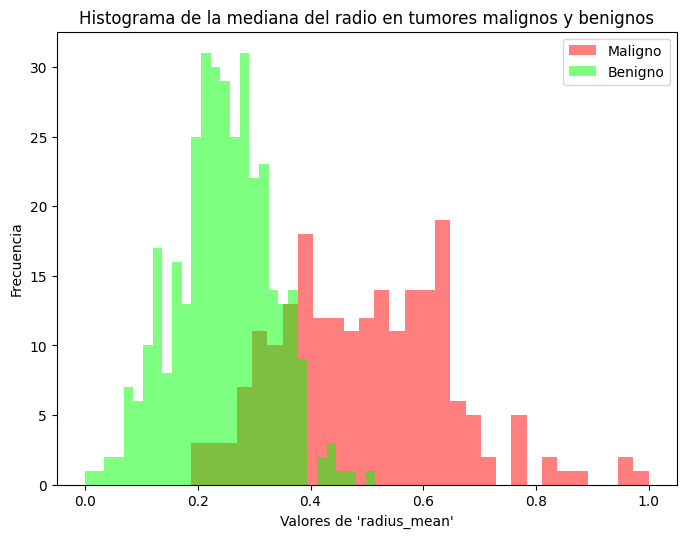

In [13]:
plt.figure(num=None, figsize=(8,6), dpi=100)

m = plt.hist(bc_df[bc_df["diagnosis"] == "M"].radius_mean, bins=30,
             fc = (1,0,0,0.5), label = "Maligno")

b = plt.hist(bc_df[bc_df["diagnosis"] == "B"].radius_mean, bins=30,
             fc = (0,1,0,0.5), label = "Benigno")

plt.legend()
plt.xlabel("Valores de 'radius_mean'")
plt.ylabel("Frecuencia")
plt.title("Histograma de la mediana del radio en tumores malignos y benignos")
plt.show()





### **Visualización de la correlación entre variables**

En la siguiente gráfica mostramos la correlación entre las variables (a excepción de la variable de diagnóstico) para poder analizar si existen variables que nos interesen agrupar.

Podemos apreciar que las que están matemáticamente relacionadas también lo están estadísticamente, como es el caso de `radius_mean` y `radius_worst`.

Por otro lado, observando las variables `compactness_mean`, `concavity_mean` y `concave points_mean` se puede extraer que están altamente correlacionadas con parte del resto de variables.

In [14]:
ix = bc_df.corr().sort_values('radius_mean', ascending=False).index
bc_df_sorted = bc_df.loc[:, ix]


<AxesSubplot:>

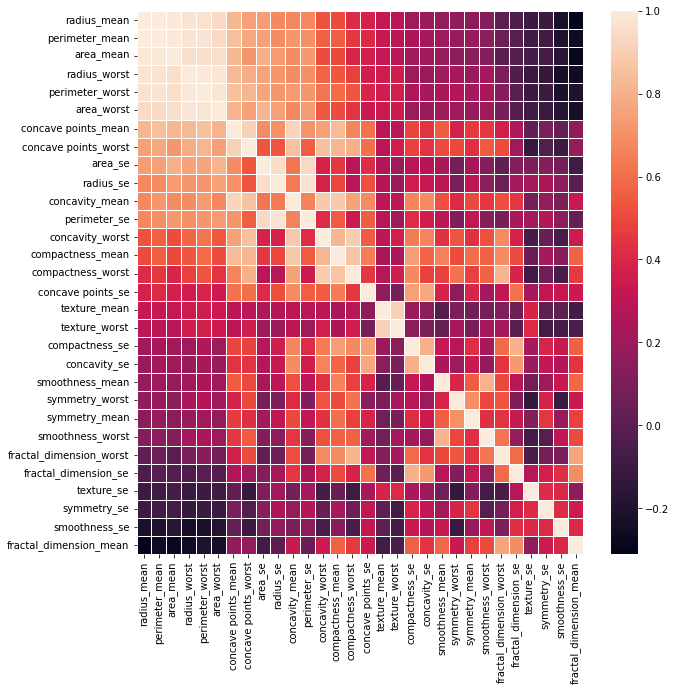

In [15]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(bc_df_sorted.corr(), linewidths=.5, fmt= '.1f', ax=ax)

### **Escición del conjunto de datos**

Separaremos los datos en:
 - Parte para el aprendizaje del modelo
 - Parte para las pruebas

In [16]:
bc_df_targets =  bc_df['diagnosis']
bc_df_features = bc_df.drop('diagnosis', 1)

<ipython-input-16-3c8b95b3920d>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  bc_df_features = bc_df.drop('diagnosis', 1)


In [17]:
train_data, test_data, train_targets, test_targets = train_test_split(bc_df_features, bc_df_targets, test_size=0.30)

## **Clasificación**


La tarea de clasificación consiste en la asignación de elementos a una de las clases previamente definidas.

Para llevar a cabo esta tarea, se dispone de un conjunto de elementos caracterizados por el par de atributos (x, y), donde x es un vector de características e y es la conocida como marca de clase.

Se plantean los modelos de: Árbol  de  decisión y  clasificador bayesiano. Se validan sendos clasificadores, validando sus resultados.

### **Árbol de decisión**

Dado un árbol de decisión, se clasifica una nueva instancia inspeccionando el mismo desde la raíz hasta llegar a un nodo hoja. Cada nodo se corresponde con un test sobre un atributo de la instancia a inspeccionar. En las hojas del árbol se encuentran valores de la marca de clase.

#### **Árbol con los datos iniciales**

Creamos el clasificador con el árbol de decisión gracias a la función `tree.DecisionTreeClassifier()` de `sklearn.tree` y lo ajustamos con los datos de entrenamiento con la función `fit` de la misma librería.

In [18]:
initial_decision_tree = tree.DecisionTreeClassifier(max_depth=4)
initial_decision_tree.fit(train_data, train_targets)

DecisionTreeClassifier(max_depth=4)

Se muestra la importancia de las diferentes variables en el árbol entrenado gracias al atributo `feature_importances_` de nuestro árbol inicial

In [19]:
feature_importances = {}
for i in range(len(features.columns)):
  feature_importances[features.columns[i]] = initial_decision_tree.feature_importances_[i]

tags_pie = []; value_pie = []
for key, value in sorted(feature_importances.items(), key = itemgetter(1), reverse = True):
  print(key, value)
  if value != 0.0:
    tags_pie.append(key)
    value_pie.append(value)

concave points_worst 0.7311715380560045
radius_worst 0.15465357396829238
area_se 0.03753705627719468
area_worst 0.02677484619790298
texture_mean 0.022813274271545433
fractal_dimension_se 0.011529537810432889
smoothness_worst 0.010170816594066238
symmetry_mean 0.005349356824560794
radius_mean 0.0
perimeter_mean 0.0
area_mean 0.0
smoothness_mean 0.0
compactness_mean 0.0
concavity_mean 0.0
concave points_mean 0.0
fractal_dimension_mean 0.0
radius_se 0.0
texture_se 0.0
perimeter_se 0.0
smoothness_se 0.0
compactness_se 0.0
concavity_se 0.0
concave points_se 0.0
symmetry_se 0.0
texture_worst 0.0
perimeter_worst 0.0
compactness_worst 0.0
concavity_worst 0.0
symmetry_worst 0.0
fractal_dimension_worst 0.0


Representación de las variables importantes según su importancia:

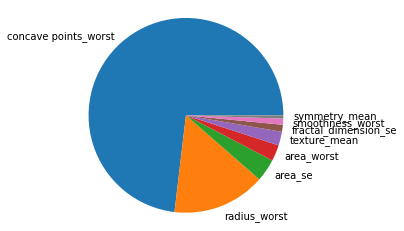

In [20]:
plt.pie(value_pie, labels=tags_pie)
plt.axis("equal")
plt.show()

Represantamos el árbol obtenido gracias al método `tree.plot_tree`:

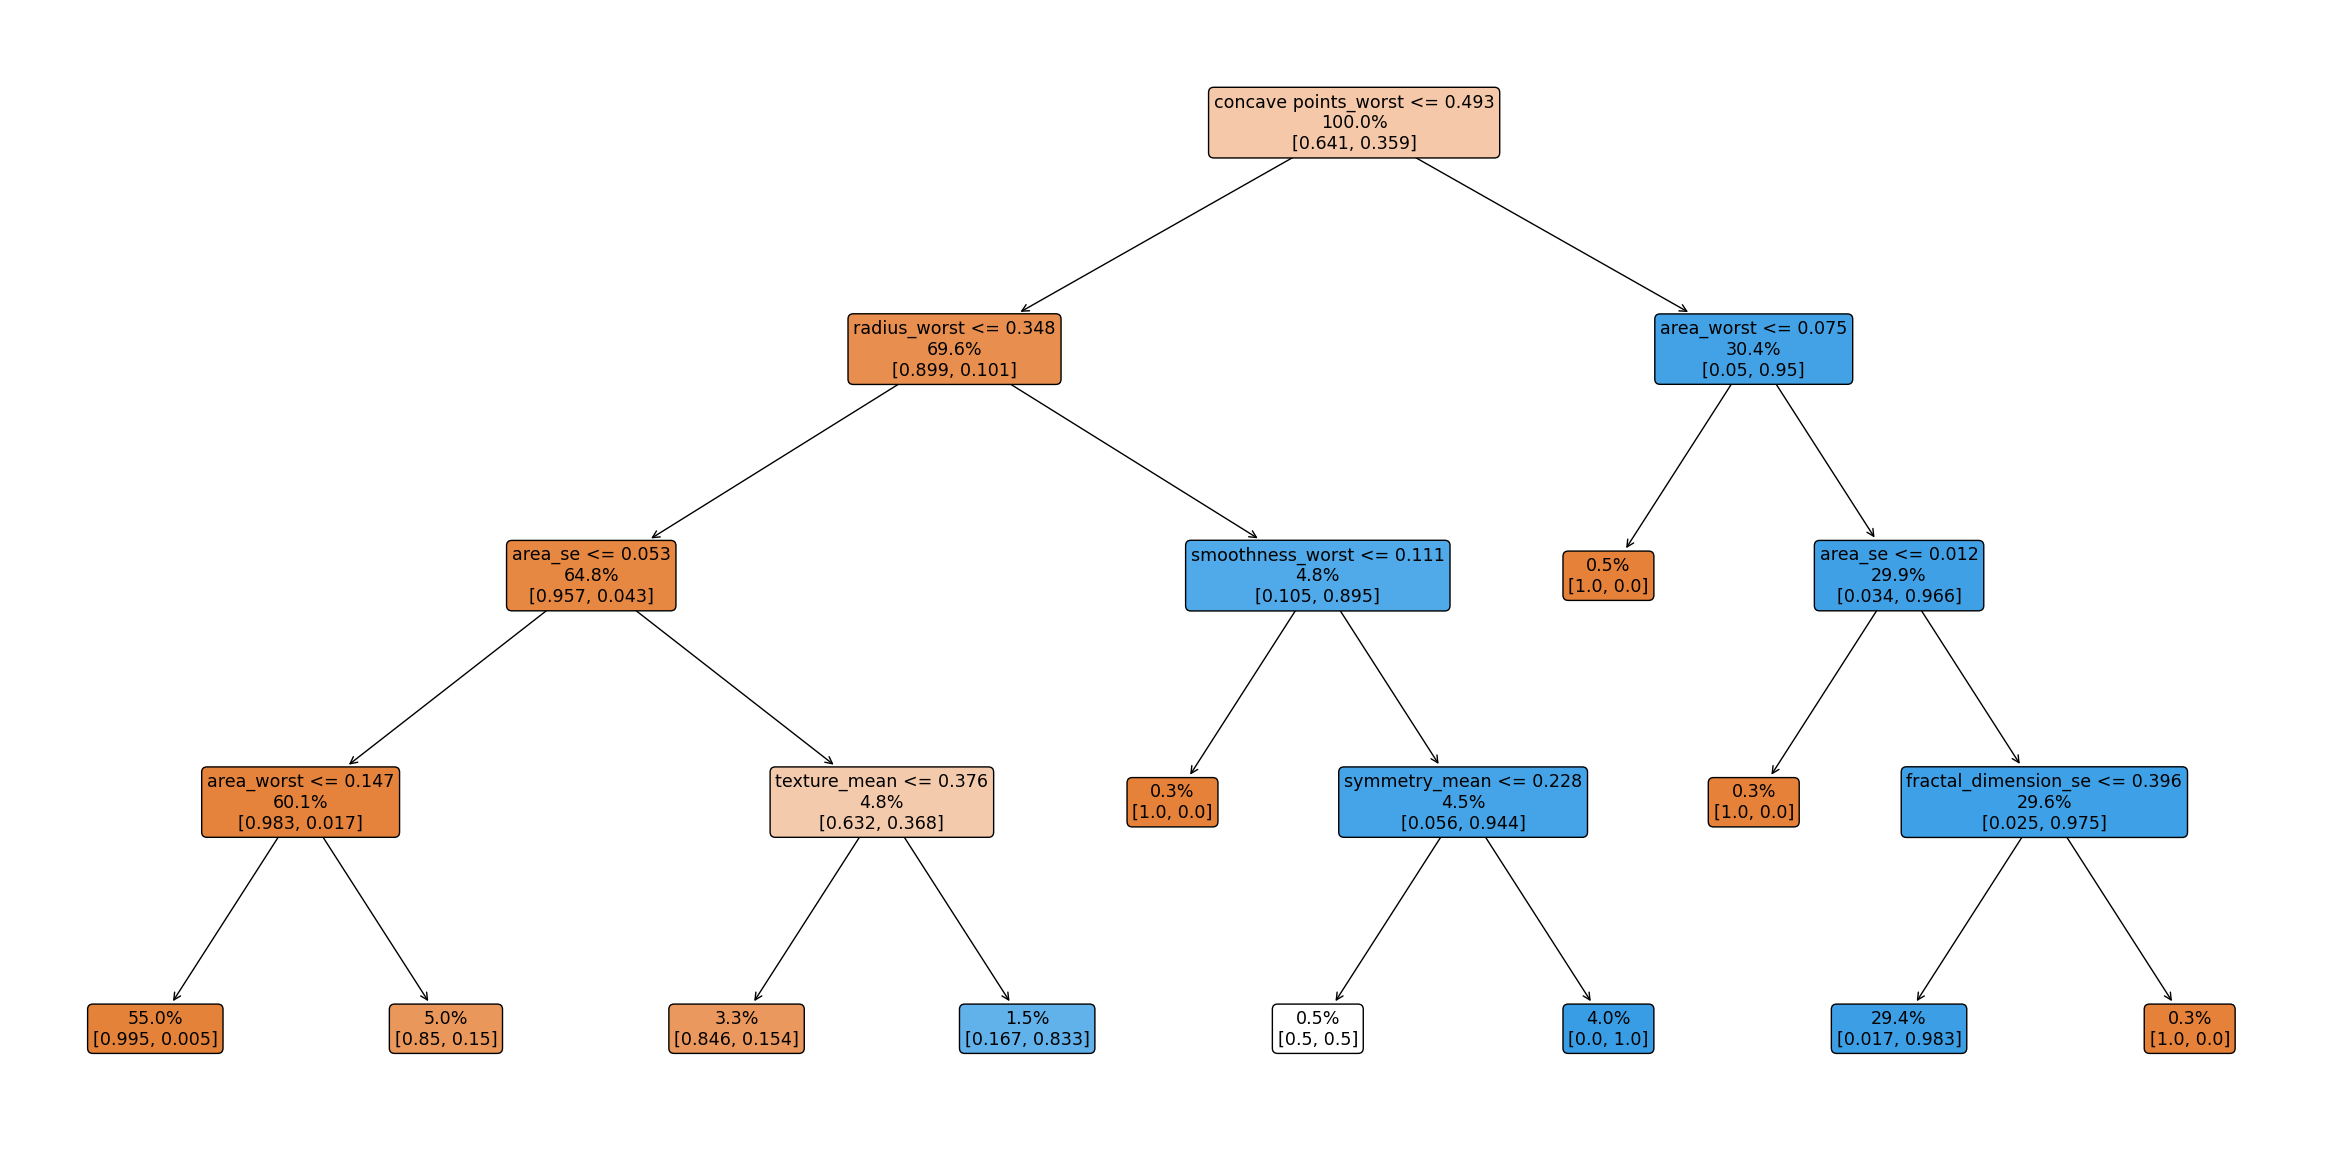

In [21]:
figure = plt.figure(num=None, figsize=(30,15), dpi=100)
tree.plot_tree(initial_decision_tree, feature_names=list(bc_df_features.columns), rounded=True, filled=True, impurity=False, proportion=True, node_ids=False, label="none" )
figure.savefig("decistion_tree.png")


In [22]:
ac_tree = accuracy_score(test_targets,initial_decision_tree.predict(test_data))
print('Accuracy is: ',ac_tree)

Accuracy is:  0.935672514619883


Como vemos, un valor percentual de precisión mayor al 90% es bastante más de los esperado, habiendo utilizado un método tan directo sobre el conjunto de datos.

Utilizamos validación cruzada para evaluar la bondad de la estructura de árbol de decisión cuando se generaliza para una mayor población.

In [23]:
cross_validation_results = cross_validate(initial_decision_tree, test_data, test_targets, cv=10)
print(cross_validation_results['test_score'])
np.mean(cross_validation_results['test_score'])

[1.         0.88235294 0.88235294 0.94117647 0.88235294 0.88235294
 0.88235294 0.88235294 0.94117647 1.        ]


0.9176470588235294

Se calcula la matriz de confusión, para verificar que no genera un gran número de falsos negativos.

In [24]:
confusion_matrix(test_targets,initial_decision_tree.predict(test_data))

array([[96,  6],
       [ 5, 64]])

#### **Árbol con los datos considerados relevantes**

Dados los resultados obtenidos, vemos que podríamos eliminar algunas variables que solo ofrecen información redundante, como por ejemplo *radius_mean* con *texture_mean*, *perimeter_mean* y *area_mean*. Para ello, eliminaremos las que tengan mayor correlación entre ellas.

De esta manera se pretende reducir la complejidad del sistema, sin afectar demasiado a la calidad de los resultados.

In [25]:
def deleteCorr(features, corr):
  result = features.copy()
  drop_list = []
  for row in result.iterrows():
    for col in result.columns:
      if row[0] != col and row[1][col] >= corr:
        result.drop([col], axis=0, inplace=True)
        result.drop([col], axis=1, inplace=True)
        drop_list.append(col)

  print('Variables eliminadas: ' + str(drop_list))
  return result, drop_list

reducedFeatures, drop_list = deleteCorr(features.corr(), 0.925)
reducedFeatures

Variables eliminadas: ['perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'radius_mean', 'perimeter_se', 'area_se', 'radius_se']


,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,compactness_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
texture_mean,1.000000,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.386358,0.006614,0.191975,...,0.163851,0.009127,0.054458,0.912045,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
smoothness_mean,-0.023389,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.068406,0.332375,0.318943,...,0.380676,0.200774,0.283607,0.036072,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.236702,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.046205,0.135299,0.738722,...,0.642262,0.229977,0.507318,0.248133,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.302418,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.076218,0.098564,0.670279,...,0.683260,0.178009,0.449301,0.299879,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.293464,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.021480,0.027653,0.490424,...,0.615634,0.095351,0.257584,0.292752,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.071401,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.128053,0.187321,0.421659,...,0.393298,0.449137,0.331786,0.090651,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.076437,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.164174,0.401964,0.559837,...,0.341198,0.345007,0.688132,-0.051269,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297
texture_se,0.386358,0.068406,0.046205,0.076218,0.021480,0.128053,0.164174,1.000000,0.397243,0.231700,...,0.230283,0.411621,0.279723,0.409003,-0.073658,-0.092439,-0.068956,-0.119638,-0.128215,-0.045655
smoothness_se,0.006614,0.332375,0.135299,0.098564,0.027653,0.187321,0.401964,0.397243,1.000000,0.336696,...,0.328429,0.413506,0.427374,-0.074743,0.314457,-0.055558,-0.058298,-0.102007,-0.107342,0.101480
compactness_se,0.191975,0.318943,0.738722,0.670279,0.490424,0.421659,0.559837,0.231700,0.336696,1.000000,...,0.744083,0.394713,0.803269,0.143003,0.227394,0.678780,0.639147,0.483208,0.277878,0.590973


Eliminamos variables que consideramos redundantes, como magnitudes físicas que tienen correlaciones cercanas a 1.

In [26]:
bc_df_reduced = bc_df.drop(drop_list,axis = 1)
bc_df_reduced.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.022658,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.120469,0.159296,...,0.300625,0.311645,0.183042,0.141525,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,M,0.272574,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.082589,0.119387,...,0.253836,0.084539,0.091110,0.303571,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,M,0.390260,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.094303,0.150831,...,0.389847,0.205690,0.127006,0.360075,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,M,0.360839,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.175875,0.251453,...,0.353665,0.728148,0.287205,0.385928,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,M,0.156578,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.093065,0.332359,...,0.357075,0.136179,0.145800,0.123934,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [27]:
bc_df_reduced_targets =  bc_df_reduced['diagnosis']
bc_df_reduced_features = bc_df_reduced.drop('diagnosis', 1)

<ipython-input-27-d282f3af40ec>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  bc_df_reduced_features = bc_df_reduced.drop('diagnosis', 1)


In [28]:
reduced_train_data, reduced_test_data, reduced_train_targets, reduced_test_targets = train_test_split(bc_df_reduced_features, bc_df_reduced_targets, test_size=0.30)

Generamos un nuevo árbol con un número más restrigido de variables (eliminando información redundante).

In [29]:
reduced_decision_tree = tree.DecisionTreeClassifier(max_depth=4)
reduced_decision_tree.fit(reduced_train_data, reduced_train_targets)

DecisionTreeClassifier(max_depth=4)

Se muestra la importancia de las diferentes variables en el árbol entrenado gracias al atributo `feature_importances_` de nuestro árbol con el número reducido de variables:

In [30]:
reduced_feature_importances = {}
for i in range(len(reducedFeatures.columns)):
  reduced_feature_importances[reducedFeatures.columns[i]] = reduced_decision_tree.feature_importances_[i]

reduced_tags_pie = []; reduced_value_pie = []
for key, value in sorted(reduced_feature_importances.items(), key = itemgetter(1), reverse = True):
  print(key, value)
  if value != 0.0:
    reduced_tags_pie.append(key)
    reduced_value_pie.append(value)

concave points_mean 0.7954851505725149
concave points_se 0.04964719995872427
texture_worst 0.04266100624429404
concave points_worst 0.04037415545835374
concavity_se 0.03270616144974944
texture_mean 0.011696785635048869
symmetry_worst 0.011445247708395534
compactness_se 0.01042377720176117
smoothness_se 0.005560515771157967
smoothness_mean 0.0
compactness_mean 0.0
concavity_mean 0.0
symmetry_mean 0.0
fractal_dimension_mean 0.0
texture_se 0.0
symmetry_se 0.0
fractal_dimension_se 0.0
smoothness_worst 0.0
compactness_worst 0.0
concavity_worst 0.0
fractal_dimension_worst 0.0


Representación de las variables importantes según su importancia:

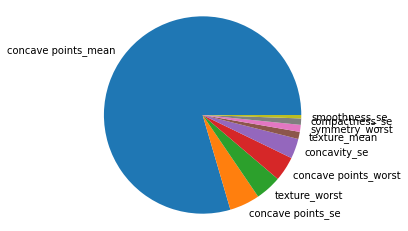

In [31]:
plt.pie(reduced_value_pie, labels=reduced_tags_pie)
plt.axis("equal")
plt.show()

Represantamos el árbol obtenido gracias al método `tree.plot_tree`:

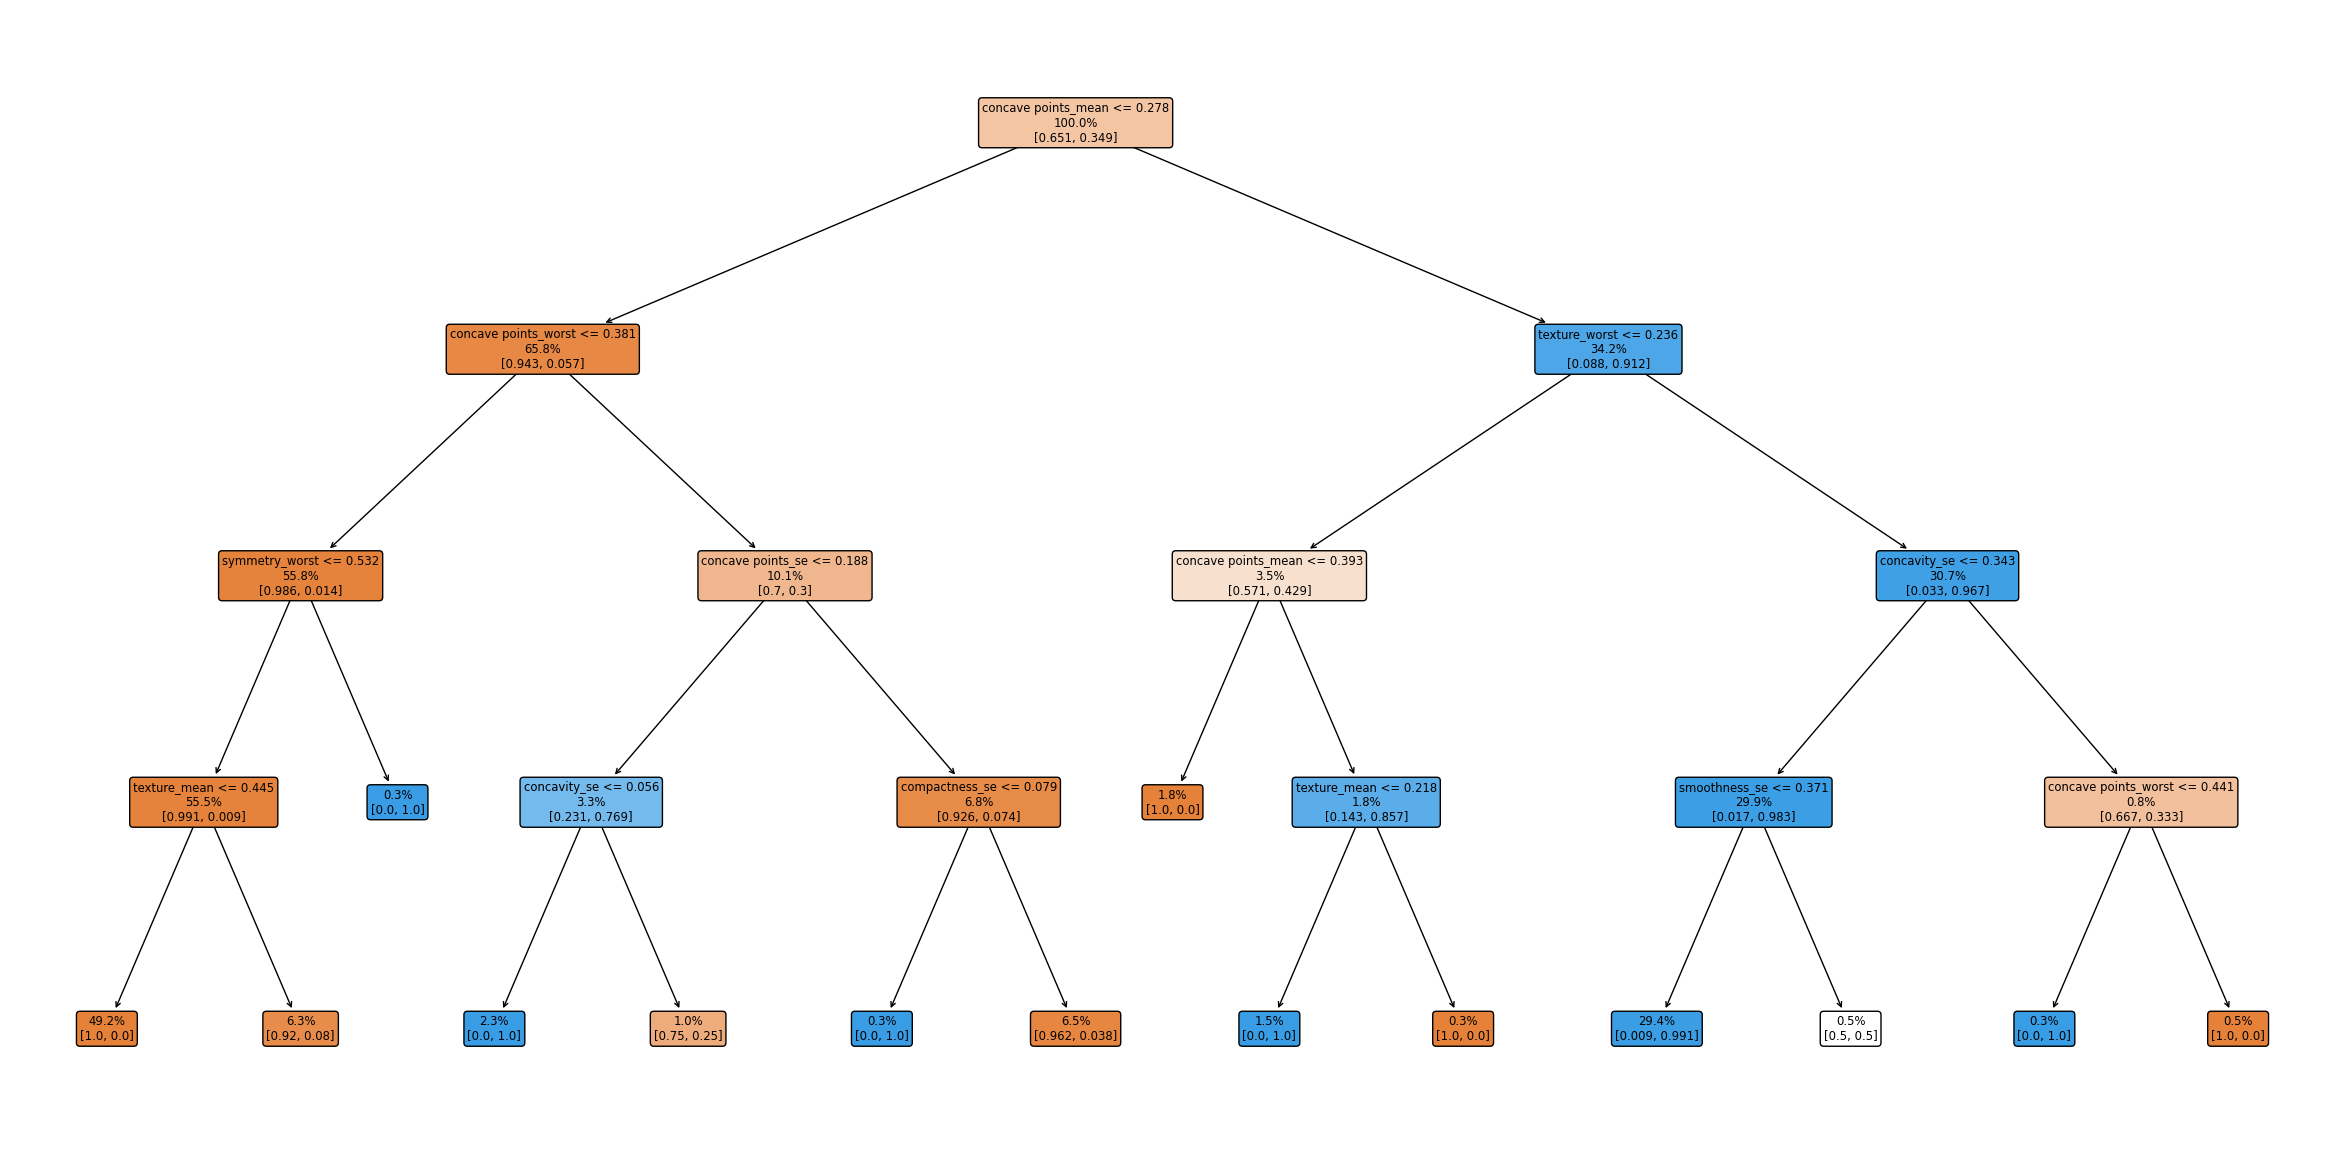

In [32]:
figure = plt.figure(num=None, figsize=(30,15), dpi=100)
tree.plot_tree(reduced_decision_tree, feature_names=list(bc_df_reduced_features.columns), rounded=True, filled=True, impurity=False, proportion=True, node_ids=False, label="none" )
figure.savefig("decistion_tree_v2.png")

Calculamos la precisión de este nuevo árbol:

In [33]:
reduced_ac_tree = accuracy_score(reduced_test_targets,reduced_decision_tree.predict(reduced_test_data))
print('Accuracy is: ',reduced_ac_tree)

Accuracy is:  0.8713450292397661


Al compararlo con el árbol inicial, podemos concluir que se obtiene una precisión muy similar, habiendo conseguido reducir el número de variables, y por tanto, la complejidad del sistema. 

Matriz de correlación con los datos considerados "relevantes":

<AxesSubplot:>

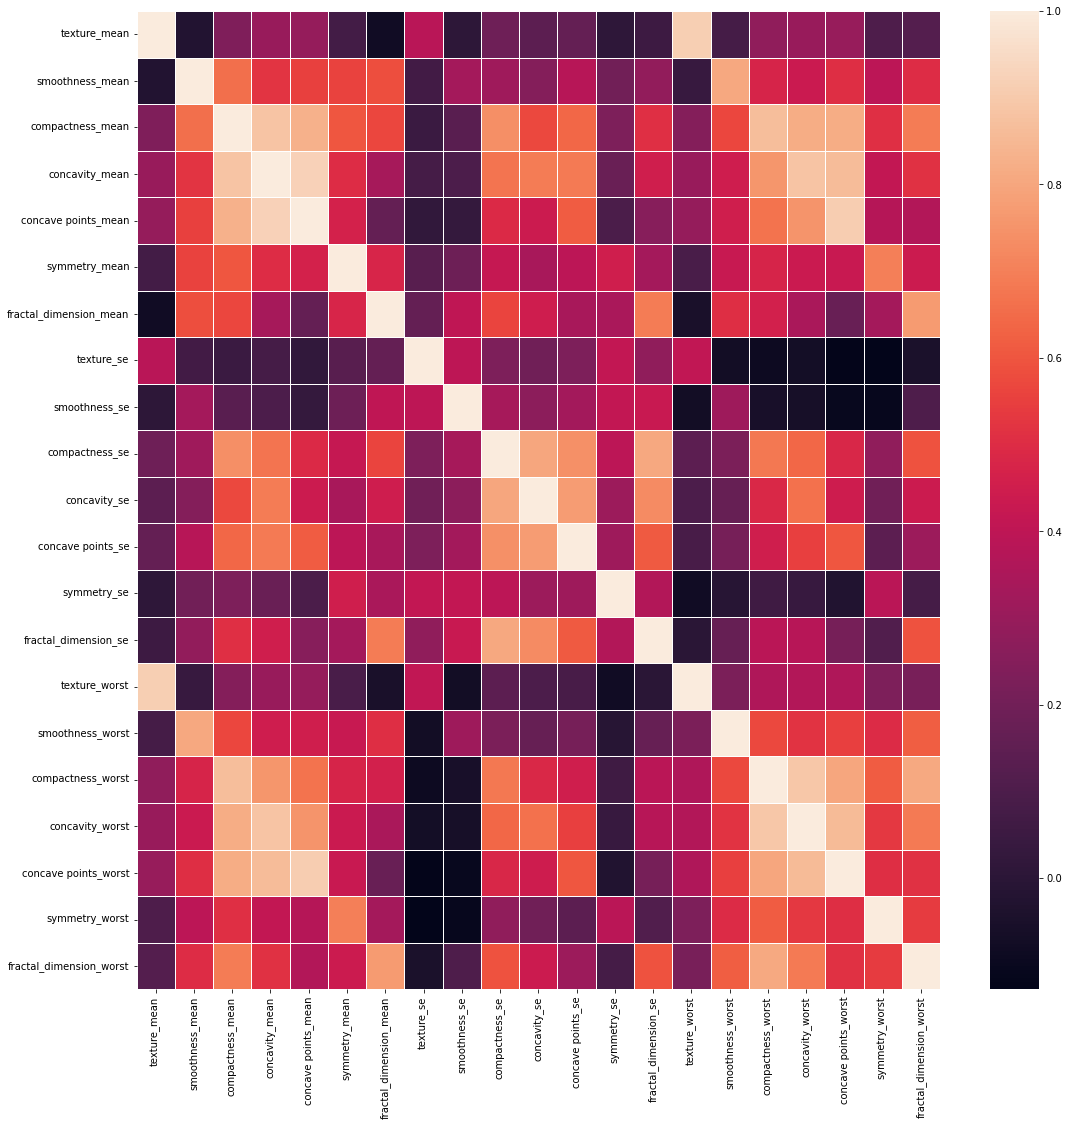

In [34]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(bc_df_reduced.corr(), linewidths=.5, fmt= '.1f', ax=ax)

Utilizamos validación cruzada para evaluar la bondad de la estructura de árbol de decisión cuando se generaliza para una mayor población.

In [35]:
reduced_cross_validation_results = cross_validate(reduced_decision_tree, reduced_test_data, reduced_test_targets, cv=10)
print(reduced_cross_validation_results['test_score'])
np.mean(reduced_cross_validation_results['test_score'])

[0.83333333 0.76470588 0.76470588 0.88235294 0.94117647 0.94117647
 1.         0.82352941 0.82352941 0.88235294]


0.8656862745098038

Se calcula la matriz de confusión, para verificar que no genera un gran número de falsos negativos.

In [36]:
confusion_matrix(reduced_test_targets,reduced_decision_tree.predict(reduced_test_data))

array([[92,  6],
       [16, 57]])

## **Cúantica**

In [37]:
bc_df_reduced_features # Se muestra el Dataframe reducido calculado anteriormente con todas las variables

,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,compactness_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.022658,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.120469,0.159296,0.351398,...,0.300625,0.311645,0.183042,0.141525,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.272574,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.082589,0.119387,0.081323,...,0.253836,0.084539,0.091110,0.303571,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.390260,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.094303,0.150831,0.283955,...,0.389847,0.205690,0.127006,0.360075,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.360839,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.175875,0.251453,0.543215,...,0.353665,0.728148,0.287205,0.385928,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.156578,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.093065,0.332359,0.167918,...,0.357075,0.136179,0.145800,0.123934,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.428813,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,0.197976,0.291906,0.200213,...,0.464861,0.045843,0.115536,0.383262,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.626987,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,0.464728,0.137879,0.165064,...,0.317863,0.156160,0.055387,0.699094,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.621238,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,0.157974,0.142435,0.263301,...,0.294942,0.074548,0.103547,0.589019,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.663510,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,0.272896,0.163477,0.445579,...,0.315211,0.216103,0.182766,0.730277,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [38]:
# Se seleccionan del Dataframe las cuatro variables, calculadas anteriormente ,que aportan mayor importancia para la clasificación
features = bc_df_reduced_features[['concave points_worst', 'concave points_mean', 'texture_mean', 'concave points_se']]
features

,concave points_worst,concave points_mean,texture_mean,concave points_se
0,0.912027,0.731113,0.022658,0.300625
1,0.639175,0.348757,0.272574,0.253836
2,0.835052,0.635686,0.390260,0.389847
3,0.884880,0.522863,0.360839,0.353665
4,0.558419,0.518390,0.156578,0.357075
...,...,...,...,...
564,0.761512,0.690358,0.428813,0.464861
565,0.559450,0.486630,0.626987,0.317863
566,0.487285,0.263519,0.621238,0.294942
567,0.910653,0.755467,0.663510,0.315211


In [39]:
# Se crea la variable labels que contiene el valor referente a las dos clases, Maligno o Benigno, en el formato necesario para el entrenamiento
labels =  np.array(bc_df_reduced_targets)

In [40]:
# Se transforman los datos del Dataframe con los datos de las cuatro características más importantes
features = MinMaxScaler().fit_transform(features)

In [41]:
# Se separa el conjunto de datos
algorithm_globals.random_seed = 121 
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

In [42]:
# Se calcula clásicamente con SVC la puntuación de acierto
svc = SVC()
_ = svc.fit(train_features, train_labels)  

In [43]:
train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.94
Classical SVC on the test dataset:     0.98


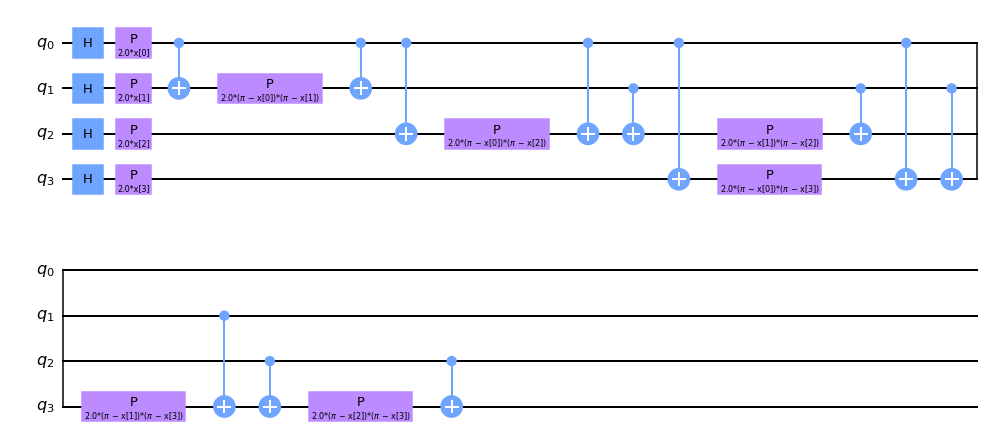

In [44]:
# Se descompone el mapa de características, con las cuatro más importantes
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=20)

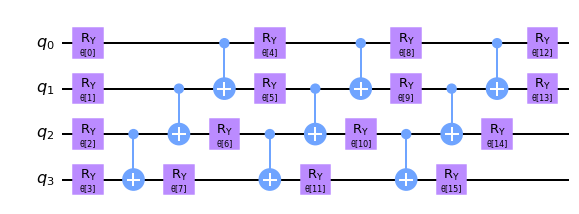

In [45]:
# Se genera el circuito ansatz. Es un modelo para un algoritmo cuántico que se construye utilizando un conjunto específico de puertas u operaciones cuánticas
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

In [46]:
# Se escoge el algoritmo de optimización a usar en el proceso de entrenamiento. COBYLA es un optimizador sin gradiente
optimizer = COBYLA(maxiter=100)

In [47]:
# Se define dónde entrenar nuestro clasificador. En este caso se utiliza un simulador.
sampler = Sampler()

In [48]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

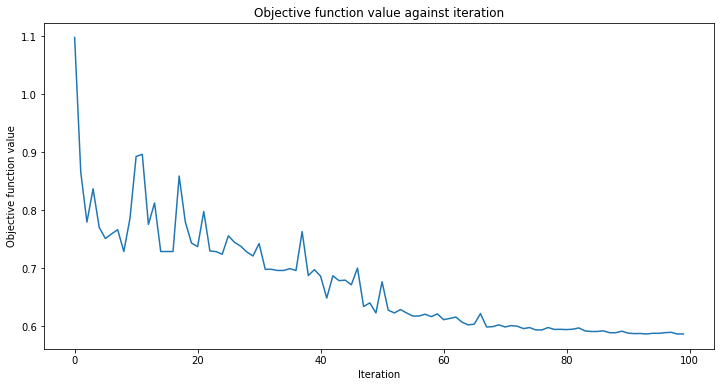

Training time: 796 seconds


In [49]:
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [50]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.86
Quantum VQC on the test dataset:     0.89


In [51]:
features = bc_df_reduced_features[['concave points_se', 'concave points_mean']]
features

,concave points_worst,concave points_mean
0,0.912027,0.731113
1,0.639175,0.348757
2,0.835052,0.635686
3,0.884880,0.522863
4,0.558419,0.518390
...,...,...
564,0.761512,0.690358
565,0.559450,0.486630
566,0.487285,0.263519
567,0.910653,0.755467


In [52]:
features = MinMaxScaler().fit_transform(features)

In [53]:
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

svc.fit(train_features, train_labels)

train_score_c2 = svc.score(train_features, train_labels)
test_score_c2 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c2:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c2:.2f}")

Classical SVC on the training dataset: 0.91
Classical SVC on the test dataset:     0.96


In [54]:
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)

In [55]:
optimizer = COBYLA(maxiter=40)

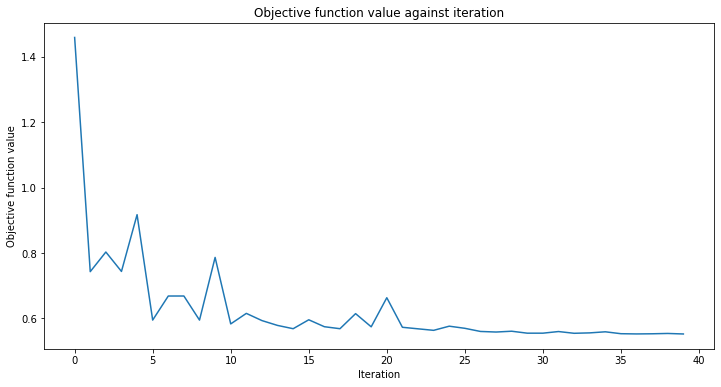

Training time: 128 seconds


In [56]:
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# make the objective function plot look nicer.
plt.rcParams["figure.figsize"] = (12, 6)


start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [57]:
train_score_q2_ra = vqc.score(train_features, train_labels)
test_score_q2_ra = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using RealAmplitudes: {train_score_q2_ra:.2f}")
print(f"Quantum VQC on the test dataset using RealAmplitudes:     {test_score_q2_ra:.2f}")

Quantum VQC on the training dataset using RealAmplitudes: 0.85
Quantum VQC on the test dataset using RealAmplitudes:     0.92


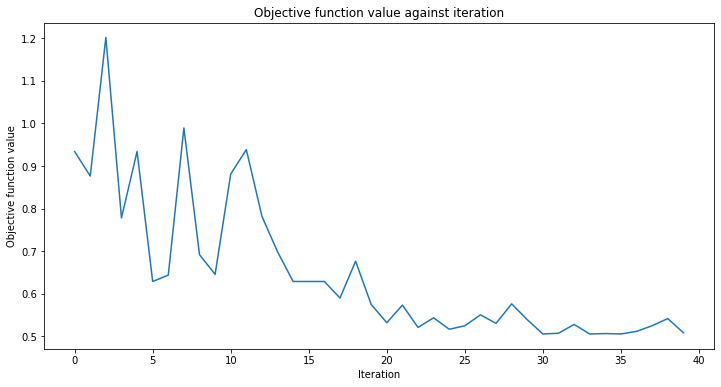

Training time: 181 seconds


In [58]:
ansatz = EfficientSU2(num_qubits=num_features, reps=3)
optimizer = COBYLA(maxiter=40)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [59]:
train_score_q2_eff = vqc.score(train_features, train_labels)
test_score_q2_eff = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_eff:.2f}")

Quantum VQC on the training dataset using EfficientSU2: 0.87
Quantum VQC on the test dataset using EfficientSU2:     0.98


In [66]:
print(f"Model                                              | Train Score  | Test Score")
print(f"SVC, 4 features                                    | {train_score_c4:10.2f}   | {test_score_c4:10.2f}")
print(f"VQC, 4 features, RealAmplitudes                    | {train_score_q4:10.2f}   | {test_score_q4:10.2f}")
print(f"---------------------------------------------------")
print(f"SVC, 2 features                                    | {train_score_c2:10.2f}   | {test_score_c2:10.2f}")
print(f"VQC, 2 features, RealAmplitudes                    | {train_score_q2_ra:10.2f}   | {test_score_q2_ra:10.2f}")
print(f"VQC, 2 features, EfficientSU2                      | {train_score_q2_eff:10.2f}   | {test_score_q2_eff:10.2f}")

Model                                              | Train Score  | Test Score
SVC, 4 features                                    |       0.94   |       0.98
VQC, 4 features, RealAmplitudes                    |       0.86   |       0.89
---------------------------------------------------
SVC, 2 features                                    |       0.91   |       0.96
VQC, 2 features, RealAmplitudes                    |       0.85   |       0.92
VQC, 2 features, EfficientSU2                      |       0.87   |       0.98


In [61]:
%qiskit_version_table
%qiskit_copyright

## Conclusiones


A continuación, se listan las principales conclusiones extraidas de cada uno de los temas abordados anteriormente. 

En el estudio de *Clasificación*, expuesto en el segundo apartado de este documento, logramos deducir que:
* Con el filtro de variables redundantes obtenemos resultados parecidos al inicial.
* La clasificación del árbol de decisión y el bayesiano dan resultados similares.
* En los árboles de clasificación, la variable concave points_mean refleja una gran importancia.

Del *Agrupamiento*, tanto basado en prototipos, jerárquico y basado en densidad, concluimos que:
* Reducir el número de variables facilita que se logren mejores agrupamiento, dado los datos que disponemos.
* Debido a que la base de datos cuenta con un número considerable de variables y de un número reducido de muestras es complicado concluir un buen agrupamiento.

El estudio del modelo *Generalizations with Self Organizing Maps* no ha supuesto una mejora en los resultados en cuanto el empleo de mapas auto organizados, respecto a los resultados obtenidos mediante la utilización de perceptrones multi-capa. Además, la visualización de los prototipos es correcta, y aunque es mejorable resulta interesante apreciar los distintos patrones que se producen en las mallas.

En el *Multi Layer Perceptron*, hemos conseguido una precisión de 97,8%. Por este motivo podemos considerar, al *Perceptrón Multicapa* como la mejor herramienta de clasificación empleada en este estudio.

Según el *Fondo mundial para la investigación de cáncer*, el cáncer de mama actualmente representa 1 de cada 4 de todos los cánceres en mujeres de todo el mundo. La *Organización mundial de la salud*, estima para el 2025 habrá hasta 2,5 millones de nuevos casos y 800 000 muertes. Además, un estudio estudio dirigido por *Louise Brinton* y *Michael B. Cook*. 

Con estos datos, hemos reflexionado eticamente respecto el proyecto. Este proyecto nos ha hecho darnos cuenta de la importancia de los estudios de muestras para la salud pública. La importancia que puede llegar a suponer responder con efectividad las dos preguntas planteadas en la introducción, podrían ser capaces de salvar vidas. Conseguir determinar lo factores que decretan que las muestras sean malignas, podría llegar a prolongar las vidas de los pacientes que la sufren. 



## Referencias

* [Base de datos](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

* [Preprocesado de datos](https://campusingenieriaytecnologia.ull.es/pluginfile.php/361162/mod_resource/content/1/PreprocesadoDatos.pdf)

* [Redes Neuronales](http://www.sc.ehu.es/ccwbayes/docencia/mmcc/docs/t8neuronales.pdf)

* [Agrupamiento mediante redes neuronales](https://campusingenieriaytecnologia.ull.es/pluginfile.php/347336/mod_resource/content/7/Agrupamiento_mediante_redes_neuronales.pdf)

* [Presentación defensa del proyecto](https://docs.google.com/presentation/d/1laPXZNDey8yAPL5pZrzNezINV6-iJxjN8ufL062k1ZU/edit?usp=sharing)
